In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
import json 
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Reading the constituency shapefile
# Taken from https://github.com/datameet/maps/blob/master/parliamentary-constituencies/india_pc_2019.shx
constituency_shapefile = '/home/sksystem/Downloads/PreCog Work/india_pc_2019.shp'
constituency_map = gpd.read_file(constituency_shapefile)

In [4]:
election_data_raw = '/home/sksystem/Downloads/PreCog Work/TCPD_GE_All_States_2023-7-24.csv/All_States_GE.csv'
election_data = gpd.read_file(election_data_raw)

In [ ]:
plot_try = constituency_map.plot(figsize=(10,10), color='white', edgecolor='black')

In [3]:
election_data_raw = '/home/sksystem/Downloads/PreCog Work/TCPD_GE_All_States_2023-7-24.csv/All_States_GE.csv'
election_data_pd = pd.read_csv(election_data_raw)

In [4]:
df = pd.DataFrame(election_data_pd)

In [5]:
# For the year 2019
df.loc[0:8612].columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
       'Election_Type'],
      dtype='object')

In [6]:
columns = ["State_Name", "Constituency_No", "Constituency_Name", "Year", "Position", "Candidate", "Sex", "Party", "Candidate_Type", "Votes", "Valid_Votes", "Electors", "Vote_Share_Percentage", "Contested", "Last_Party", "Last_Constituency_Name"]

In [7]:
df=df.loc[0:8612, columns]

In [8]:
grouped_by_state = df.groupby('State_Name')

In [20]:
# Total number of votes per state
total_votes_per_state = grouped_by_state["Votes"].sum()
print(total_votes_per_state, "Total votes per state")

State_Name
Andaman_&_Nicobar_Islands      207296
Andhra_Pradesh               31612534
Arunachal_Pradesh              652091
Assam                        17986066
Bihar                        41595340
Chandigarh                     456568
Chhattisgarh                 13614453
Dadra_&_Nagar_Haveli           198983
Daman_&_Diu                     87469
Delhi                         8679012
Goa                            853203
Gujarat                      29081964
Haryana                      12681536
Himachal_Pradesh              3850732
Jammu_&_Kashmir               3552622
Jharkhand                    14961958
Karnataka                    35138682
Kerala                       20385216
Lakshadweep                     47009
Madhya_Pradesh               36910610
Maharashtra                  55308882
Manipur                       1617330
Meghalaya                     1367231
Mizoram                        499621
Nagaland                      1006357
Odisha                       23794122
P

In [26]:
# Data aggregation by State : Votes, Vote_Share, Electors, Valid_Votes
aggregated_data = grouped_by_state.agg(
    {
        "Votes":"sum",
        "Electors":"sum",
        "Valid_Votes":"sum",
        "Vote_Share_Percentage":"mean"
    }
)
print(aggregated_data)

                              Votes    Electors  Valid_Votes  \
State_Name                                                     
Andaman_&_Nicobar_Islands    207296     5095536      3316736   
Andhra_Pradesh             31612534   544490417    435820966   
Arunachal_Pradesh            652091     5748928      4629166   
Assam                      17986066   258421795    211832109   
Bihar                      41595340  1208258903    685691231   
Chandigarh                   456568    23928973     16893016   
Chhattisgarh               13614453   317385187    224203060   
Dadra_&_Nagar_Haveli         198983     3000348      2387796   
Daman_&_Diu                   87469      608700       437345   
Delhi                       8679012   343150615    208175904   
Goa                          853203     7952791      5972421   
Gujarat                    29081964   695110677    444749652   
Haryana                    12681536   419912432    294439782   
Himachal_Pradesh            3850732    6

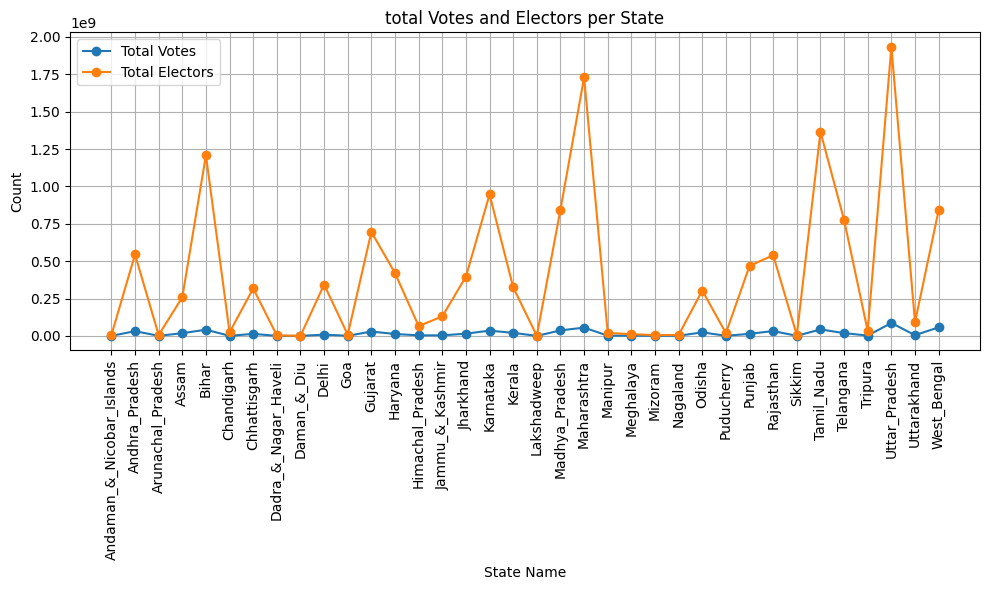

In [56]:
# Initial plotting: priliminary analysis
plt.figure(figsize=(10,6))
plt.plot(aggregated_data.index, aggregated_data["Votes"], label = "Total Votes", marker = "o")
plt.plot(aggregated_data.index, aggregated_data["Electors"], label = "Total Electors", marker = "o")

plt.title("total Votes and Electors per State")
plt.xlabel("State Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# The above graph is non-comprehensible, so we need to normalize the values for a better visualization
scaler = MinMaxScaler()
aggregated_votes_normalized = scaler.fit_transform(aggregated_data[["Votes"]].values)

In [41]:
aggregated_votes_normalized_df = pd.DataFrame(aggregated_votes_normalized, index=aggregated_data.index, columns=["Votes_Normalized"])

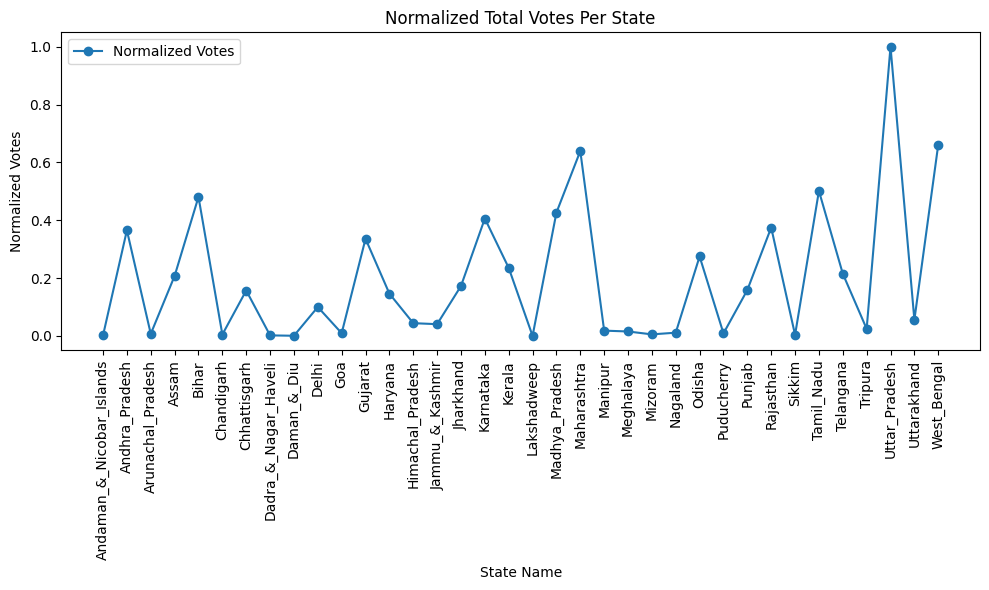

In [55]:
plt.figure(figsize=(10,6))
plt.plot(aggregated_votes_normalized_df.index, aggregated_votes_normalized_df["Votes_Normalized"], label = "Normalized Votes", marker = "o")

plt.title("Normalized Total Votes Per State")
plt.xlabel("State Name")
plt.ylabel("Normalized Votes")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

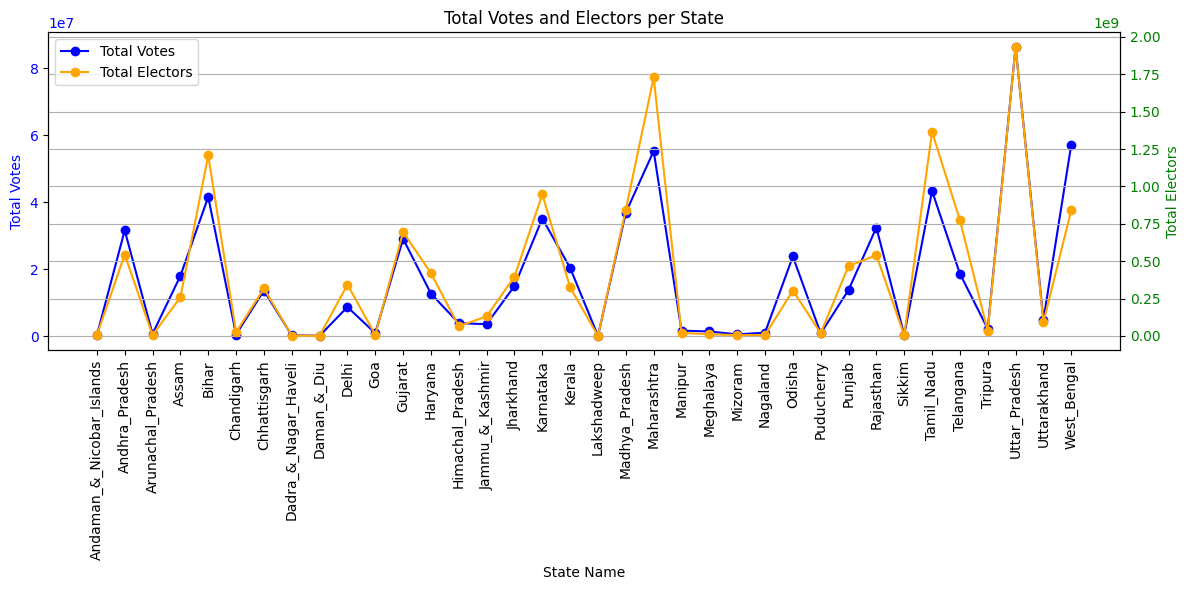

In [57]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(aggregated_data.index, aggregated_data["Votes"], label="Total Votes", marker='o', color='b')
ax1.set_xlabel("State Name")
ax1.set_ylabel("Total Votes", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(aggregated_data.index, aggregated_data["Electors"], label="Total Electors", marker='o', color='orange')
ax2.set_ylabel("Total Electors", color='g')
ax2.tick_params(axis='y', labelcolor='g')


plt.title("Total Votes and Electors per State")
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.grid(True)
plt.tight_layout()
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")
plt.show()
